# EDA de Features v2 — Phishing Español

Análisis técnico y validación contractual del extractor v2.

## 1. CARGA DE DATOS

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FEATURES = [
    'domain_complexity',
    'host_entropy',
    'domain_whitelist_score',
    'suspicious_path_token',
    'token_density',
    'trusted_token_context',
    'infra_risk',
    'fake_tld_in_subdomain_or_path',
    'param_count_boost'
]

df = pd.read_csv('../data/clean/dataset_v1_features.csv')
print('Shape:', df.shape)
print('Columnas:', list(df.columns))
display(df.head())
assert all(f in df.columns for f in FEATURES), 'Faltan features contractuales'

Shape: (200, 11)
Columnas: ['url', 'label', 'domain_complexity', 'host_entropy', 'domain_whitelist_score', 'suspicious_path_token', 'token_density', 'trusted_token_context', 'infra_risk', 'fake_tld_in_subdomain_or_path', 'param_count_boost']


,url,label,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
0,https://www.caixabank.es/particular/banca-digi...,0,31.699250,-0.00,1.0,0.0,0.125,0.0,0.0,0.0,0.0
1,https://accounts.google.com/ServiceLogin?servi...,0,19.182958,2.75,0.0,0.0,0.000,-1.0,0.0,0.0,0.5
2,https://www.roblox.com/es/upgrades/robux?ctx=n...,0,22.516292,-0.00,0.0,0.0,0.000,0.0,0.0,1.0,0.5
3,https://zoom.us/es/join,0,10.500000,0.00,0.0,0.0,0.000,0.0,0.0,1.0,0.0
4,https://www.roblox.com/es/login,0,22.516292,-0.00,0.0,0.0,0.000,-1.0,0.0,1.0,0.0


## 2. VALIDACIONES CONTRACTUALES (A1–A5)

In [7]:
FEATURES = [
    "domain_complexity",
    "host_entropy",
    "domain_whitelist_score",
    "suspicious_path_token",
    "token_density",
    "trusted_token_context",
    "infra_risk",
    "fake_tld_in_subdomain_or_path",
    "param_count_boost",
]

# --- A1: columnas correctas y en orden contractual ---
expected_columns = ["url", "label"] + FEATURES

assert list(df.columns) == expected_columns, (
    f"ERROR A1: Las columnas no coinciden con el orden contractual.\n"
    f"Esperado: {expected_columns}\n"
    f"Encontrado: {list(df.columns)}"
)

print("A1 ✓ Columnas y orden contractual correctos.")

# --- A2: todas numéricas ---
for f in FEATURES:
    if df[f].dtype not in (np.float64, np.int64, float, int):
        print(f"ADVERTENCIA A2: {f} tiene dtype extraño → {df[f].dtype}")

print("A2 ✓ Tipos numéricos verificados (con advertencias si procede).")

# --- A3: ausencia de NaN, None, strings, listas ---
for f in FEATURES:
    if df[f].isna().any():
        print(f"ADVERTENCIA A3: {f} contiene NaN.")

    # Detectar strings
    if df[f].apply(lambda x: isinstance(x, str)).any():
        print(f"ADVERTENCIA A3: {f} contiene strings, lo cual es incorrecto.")

    # Detectar listas u objetos raros
    if df[f].apply(lambda x: isinstance(x, (list, tuple, dict, set))).any():
        print(f"ERROR A3: {f} contiene estructuras no numéricas.")

print("A3 ✓ Validación de valores realizada.")

# --- A4: orden contractual ya comprobado arriba ---
print("A4 ✓ Orden contractual validado.")

# --- A5: estructura estricta de 9 features ---
assert len(FEATURES) == 9, "A5 ERROR: Deben ser 9 features exactamente."
print("A5 ✓ Número correcto de features.")


A1 ✓ Columnas y orden contractual correctos.
A2 ✓ Tipos numéricos verificados (con advertencias si procede).
A3 ✓ Validación de valores realizada.
A4 ✓ Orden contractual validado.
A5 ✓ Número correcto de features.


## 3. ESTADÍSTICOS DESCRIPTIVOS

,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.507147,0.990088,0.175000,0.045000,0.017906,-0.075000,0.173500,0.190000,0.026667
std,21.972718,1.351174,0.380921,0.207824,0.051544,0.412585,0.571472,0.393285,0.117483
min,0.000000,-0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,21.993786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.256332,2.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,108.161656,3.978334,1.000000,1.000000,0.250000,1.000000,3.300000,1.000000,0.666667


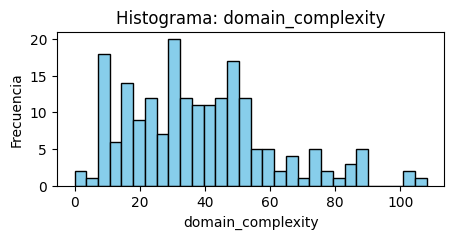

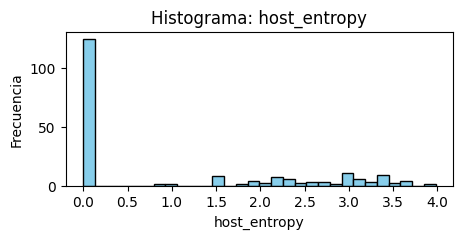

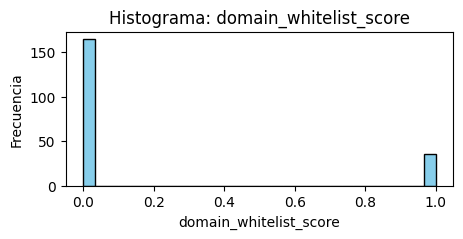

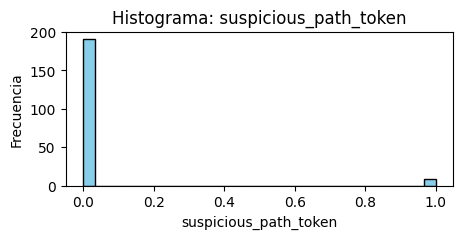

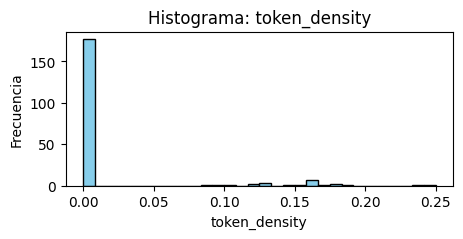

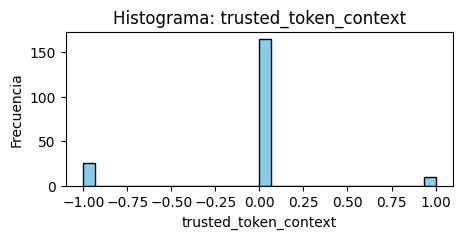

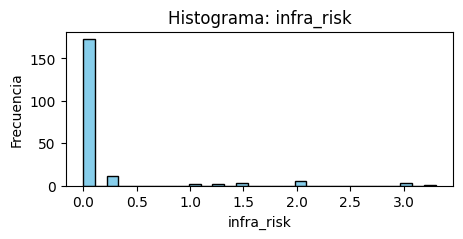

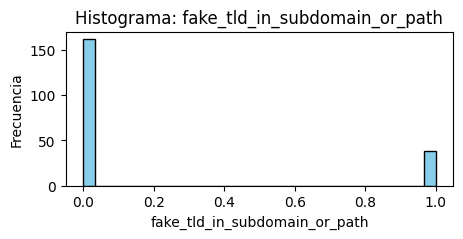

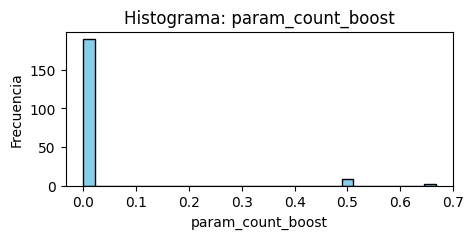

Outliers en domain_complexity:


,url,label,domain_complexity
189,https://ampliaciones.zonasolicitudeampliacion....,1,108.161656


Outliers en suspicious_path_token:


,url,label,suspicious_path_token
9,https://www.financieraelcorteingles.es/es/pago...,0,1.0
11,https://www.mediamarkt.es/es/service/opciones-...,0,1.0
17,https://sede.dgt.gob.es/es/multas/pago-de-multas/,0,1.0
23,https://www.ionos.es/ayuda/sitios-web-tiendas/...,0,1.0
58,https://www.orange.es/pago-facturas,0,1.0


Outliers en token_density:


,url,label,token_density
9,https://www.financieraelcorteingles.es/es/pago...,0,0.1875
11,https://www.mediamarkt.es/es/service/opciones-...,0,0.1800
17,https://sede.dgt.gob.es/es/multas/pago-de-multas/,0,0.1800
58,https://www.orange.es/pago-facturas,0,0.2500
93,https://www.bancosantander.es/particulares/ban...,0,0.2400


Outliers en infra_risk:


,url,label,infra_risk
127,https://ingsecusecuring.web.app/,1,3.0
133,https://alerta-cliente.app,1,2.0
157,https://particulares-netbancosantander.web.app/,1,3.0
160,https://crelosa.app/lnn/dhl-new%20(1).html,1,2.0
172,https://dhl.com-esoo.top/es,1,2.0


Outliers en param_count_boost:


,url,label,param_count_boost
1,https://accounts.google.com/ServiceLogin?servi...,0,0.500000
2,https://www.roblox.com/es/upgrades/robux?ctx=n...,0,0.500000
63,https://www.openbank.es/?toggleLogin&go-to-app=0,0,0.666667
123,http://soporte_ionos.viajoencoche.es/?rid=48Y9hLX,1,0.500000
124,http://www.ionosesfacturas.rf.gd/?i=1,1,0.500000


In [8]:
display(df[FEATURES].describe())

# Histogramas
for f in FEATURES:
    plt.figure(figsize=(5,2))
    plt.hist(df[f], bins=30, color='skyblue', edgecolor='k')
    plt.title(f'Histograma: {f}')
    plt.xlabel(f)
    plt.ylabel('Frecuencia')
    plt.show()

# Detección de outliers por z-score
from scipy.stats import zscore
outlier_dict = {}
for f in FEATURES:
    z = np.abs(zscore(df[f].astype(float)))
    outliers = df[z > 3][['url', 'label', f]]
    if not outliers.empty:
        print(f'Outliers en {f}:')
        display(outliers.head())
    outlier_dict[f] = outliers

## 4. DISTRIBUCIÓN POR CLASE

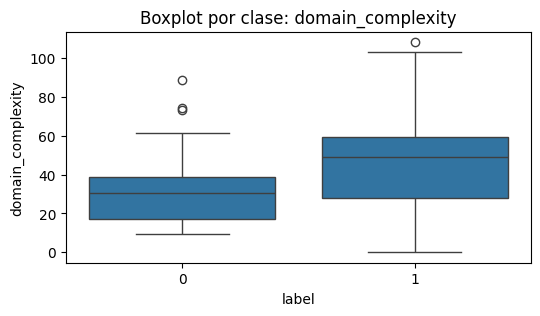

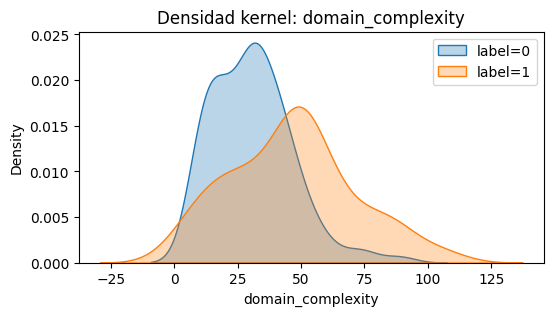

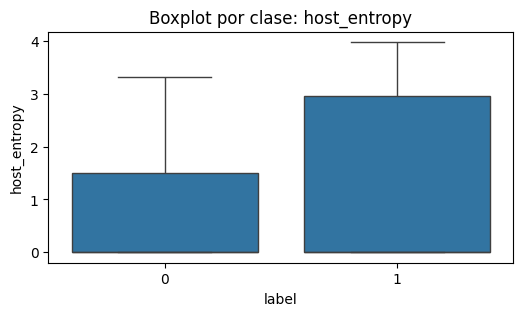

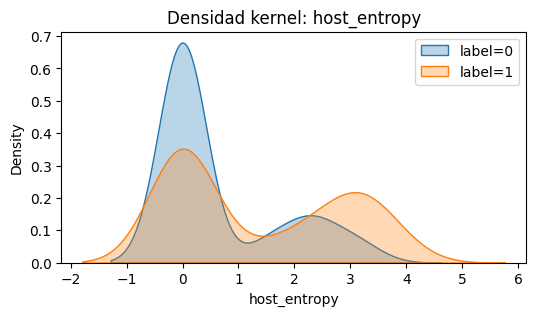

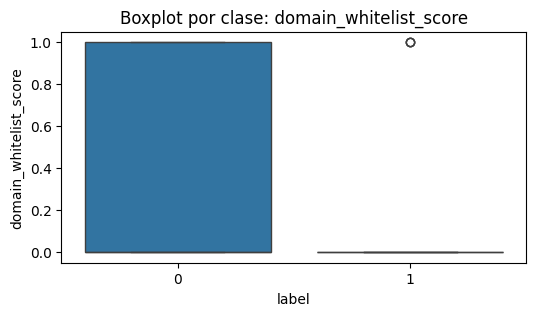

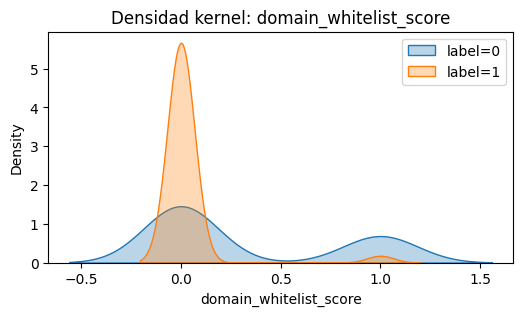

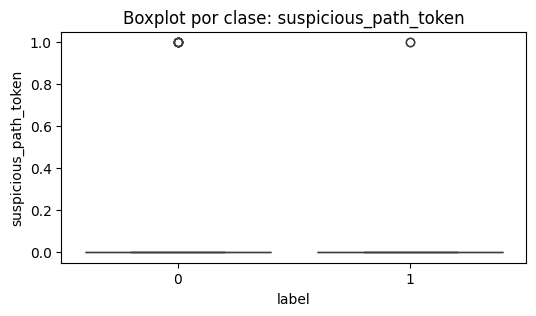

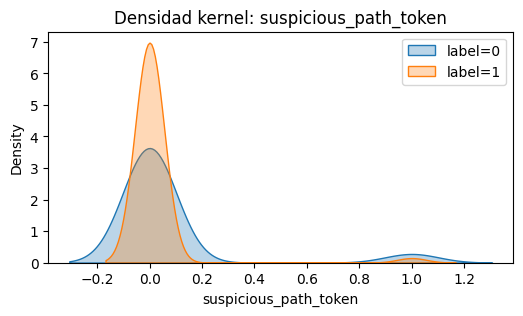

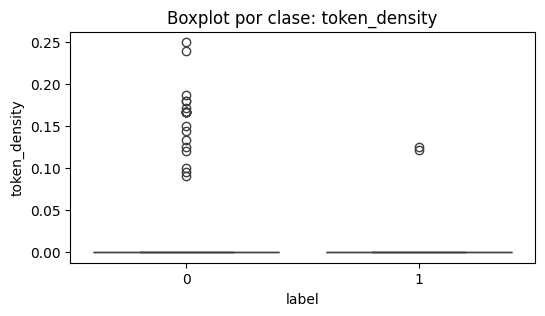

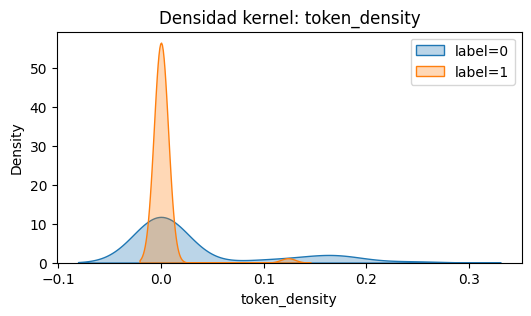

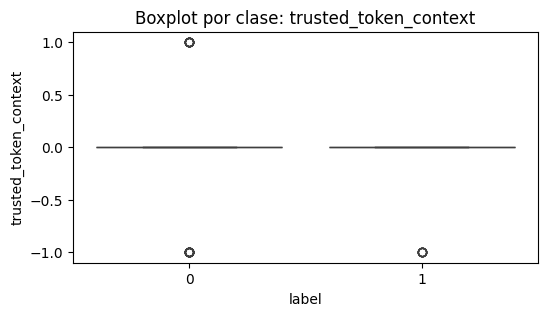

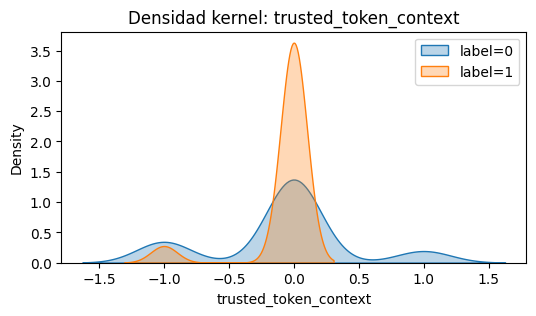

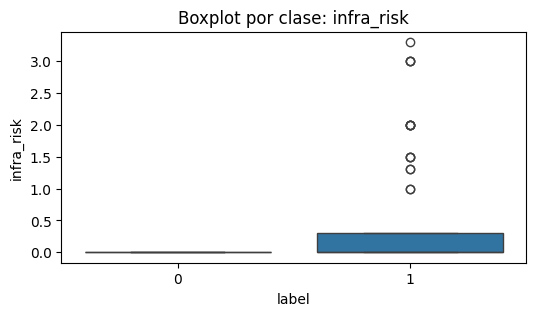

/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_78900/2295648312.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['label']==label][f], label=f'label={label}', fill=True, alpha=0.3)


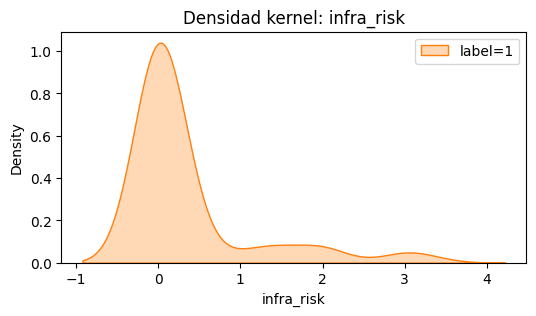

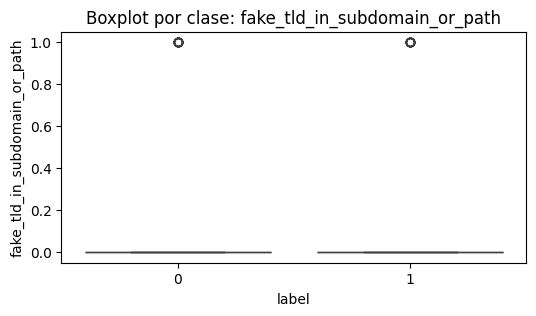

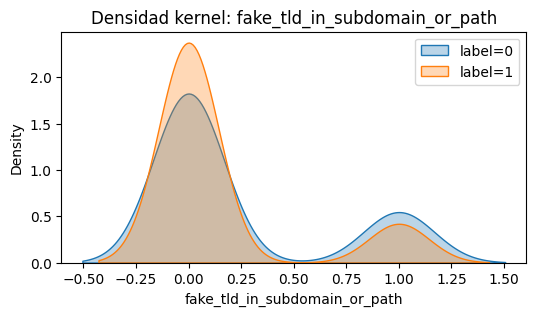

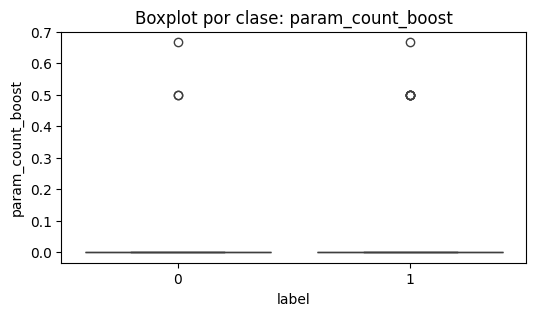

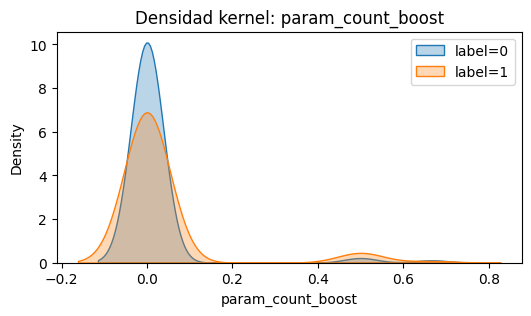

In [9]:
for f in FEATURES:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='label', y=f, data=df, showfliers=True)
    plt.title(f'Boxplot por clase: {f}')
    plt.show()
    # Kernel density plot opcional
    plt.figure(figsize=(6,3))
    for label in df['label'].unique():
        sns.kdeplot(df[df['label']==label][f], label=f'label={label}', fill=True, alpha=0.3)
    plt.title(f'Densidad kernel: {f}')
    plt.legend()
    plt.show()

## 5. MATRIZ DE CORRELACIÓN

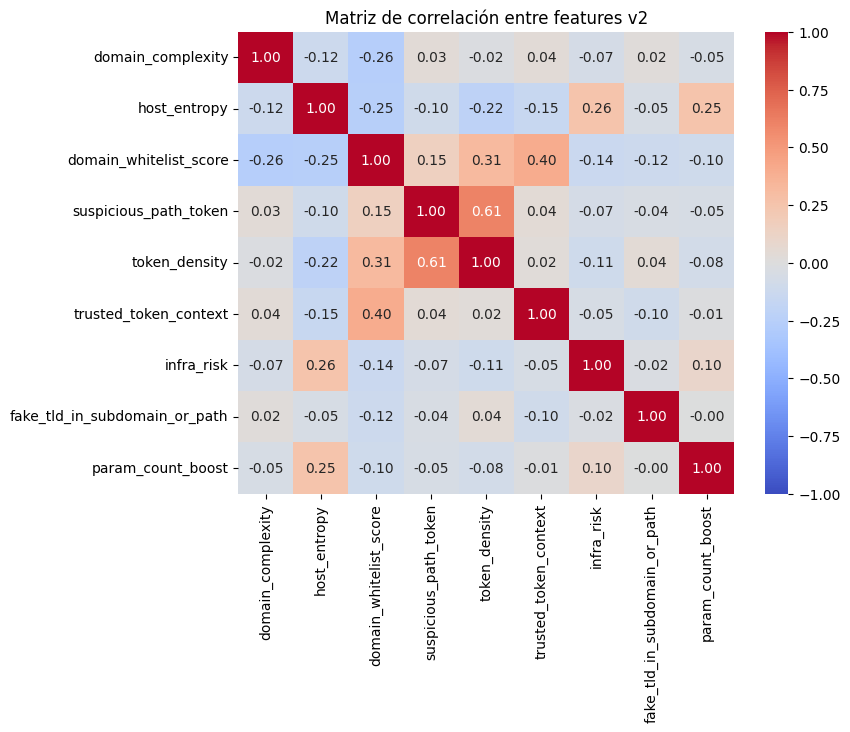

Correlaciones fuertes (>0.8 o <-0.8):


In [10]:
corr = df[FEATURES].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre features v2')
plt.show()

# Comentar correlaciones peligrosas o redundancias
print('Correlaciones fuertes (>0.8 o <-0.8):')
for i in range(len(FEATURES)):
    for j in range(i+1, len(FEATURES)):
        val = corr.iloc[i,j]
        if abs(val) > 0.8:
            print(f'{FEATURES[i]} vs {FEATURES[j]}: {val:.2f}')

## 6. DETECCIÓN DE PROBLEMAS ESPECÍFICOS

In [11]:
# 1) fake_tld_in_subdomain_or_path
print('Legítimas con fake_tld_in_subdomain_or_path=1:')
display(df[(df['label']==0) & (df['fake_tld_in_subdomain_or_path']==1)][['url']+FEATURES])
print('Phishing con fake_tld_in_subdomain_or_path=0:')
display(df[(df['label']==1) & (df['fake_tld_in_subdomain_or_path']==0)][['url']+FEATURES])

# 2) token_density
print('Legítimas con token_density > 0.5:')
display(df[(df['label']==0) & (df['token_density']>0.5)][['url']+FEATURES])
print('Phishing con token_density=0:')
display(df[(df['label']==1) & (df['token_density']==0)][['url']+FEATURES])

# 3) infra_risk
print('Distribución infra_risk por TLD:')
df['tld'] = df['url'].str.extract(r'([a-z]{2,})[/?]?$')
display(df.groupby('tld')['infra_risk'].describe())
print('URLs con infra_risk < 0.1 y label=1:')
display(df[(df['label']==1) & (df['infra_risk']<0.1)][['url']+FEATURES])

# 4) trusted_token_context
print('Legítimas con trusted_token_context=-1:')
display(df[(df['label']==0) & (df['trusted_token_context']==-1)][['url']+FEATURES])
print('Phishing con trusted_token_context=1:')
display(df[(df['label']==1) & (df['trusted_token_context']==1)][['url']+FEATURES])

Legítimas con fake_tld_in_subdomain_or_path=1:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
2,https://www.roblox.com/es/upgrades/robux?ctx=n...,22.516292,-0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.5
3,https://zoom.us/es/join,10.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
4,https://www.roblox.com/es/login,22.516292,-0.000000,0.0,0.0,0.000000,-1.0,0.0,1.0,0.0
7,https://help.coinbase.com/es-es,36.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
12,https://www.coinbase.com/es-es,36.000000,-0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
15,https://www.bancsabadell.com/bsnacional/es/emp...,45.686217,-0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
17,https://sede.dgt.gob.es/es/multas/pago-de-multas/,15.849625,1.500000,0.0,1.0,0.180000,0.0,0.0,1.0,0.0
18,https://sede.dgt.gob.es/es/otros-tramites/cita...,15.849625,1.500000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
28,https://www.netflix.com/es/login,30.880904,-0.000000,0.0,0.0,0.000000,-1.0,0.0,1.0,0.0
32,https://www.netflix.com/es/loginHelp,30.880904,-0.000000,0.0,0.0,0.000000,-1.0,0.0,1.0,0.0


Phishing con fake_tld_in_subdomain_or_path=0:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
100,http://caixacapitalrisc.send2sign.es/login,32.705767,2.905639,0.0,0.0,0.0,-1.0,0.3,0.0,0.0
101,https://b9xja.dgnsvwrk.es/DwD9I@prmk4JYY2V/*to...,33.000000,2.321928,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,https://robllox.com.es,31.302969,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,https://zooominvitenotice.es/project/Windows/i...,59.684683,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,https://robiox.com.es,29.271179,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
192,http://bancosantaderonline.com,77.420101,0.000000,0.0,0.0,0.0,0.0,0.3,0.0,0.0
193,http://bancosantander.es.hotelparadis.es/aviso...,51.274438,3.155639,0.0,0.0,0.0,-1.0,0.3,0.0,0.0
196,https://bbva.soporte-web.info/login,49.532724,1.500000,0.0,0.0,0.0,-1.0,1.5,0.0,0.0
198,https://lastbut-bc9a4f.ingress-florina.ewp.liv...,12.679700,3.978334,0.0,0.0,0.0,-1.0,3.0,0.0,0.0


Legítimas con token_density > 0.5:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost


Phishing con token_density=0:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
100,http://caixacapitalrisc.send2sign.es/login,32.705767,2.905639,0.0,0.0,0.0,-1.0,0.3,0.0,0.0
101,https://b9xja.dgnsvwrk.es/DwD9I@prmk4JYY2V/*to...,33.000000,2.321928,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,https://robllox.com.es,31.302969,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,https://zooominvitenotice.es/project/Windows/i...,59.684683,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,https://robiox.com.es,29.271179,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,https://bbva.es.personal-cuenta.info/personal/...,70.137812,2.251629,0.0,0.0,0.0,0.0,1.5,1.0,0.5
196,https://bbva.soporte-web.info/login,49.532724,1.500000,0.0,0.0,0.0,-1.0,1.5,0.0,0.0
197,https://corroes-ep.top/es,38.106993,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.0
198,https://lastbut-bc9a4f.ingress-florina.ewp.liv...,12.679700,3.978334,0.0,0.0,0.0,-1.0,3.0,0.0,0.0


Distribución infra_risk por TLD:


,count,mean,std,min,25%,50%,75%,max
tld,,,,,,,,
acceso,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
app,3.0,2.666667,0.57735,2.0,2.5,3.0,3.0,3.0
ayuda,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
blog,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
cc,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
vamos,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
vinc,1.0,0.300000,NaN,0.3,0.3,0.3,0.3,0.3
vip,1.0,0.300000,NaN,0.3,0.3,0.3,0.3,0.3


URLs con infra_risk < 0.1 y label=1:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
101,https://b9xja.dgnsvwrk.es/DwD9I@prmk4JYY2V/*to...,33.000000,2.321928,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,https://robllox.com.es,31.302969,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,https://zooominvitenotice.es/project/Windows/i...,59.684683,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,https://robiox.com.es,29.271179,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,http://unicismadrid.es/wp-content/com/index/ch...,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
189,https://ampliaciones.zonasolicitudeampliacion....,108.161656,3.251629,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,https://appcanaldigital.com/,56.497588,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,https://clientepresenteado.digital/inicio,85.870792,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,https://banco-galicia-online.com/galicia/confirm,77.008679,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Legítimas con trusted_token_context=-1:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
1,https://accounts.google.com/ServiceLogin?servi...,19.182958,2.750000,0.0,0.0,0.000000,-1.0,0.0,0.0,0.5
4,https://www.roblox.com/es/login,22.516292,-0.000000,0.0,0.0,0.000000,-1.0,0.0,1.0,0.0
10,https://www.pccomponentes.com/login,49.830552,-0.000000,0.0,0.0,0.000000,-1.0,0.0,0.0,0.0
13,https://www.dropbox.com/es_ES/login,27.738047,-0.000000,0.0,0.0,0.000000,-1.0,0.0,0.0,0.0
14,https://identidad.ibercaja.es/soporte/platafor...,30.250000,2.419382,0.0,0.0,0.000000,-1.0,0.0,0.0,0.0
19,https://univia.unicajabanco.es/login,42.830828,2.251629,0.0,0.0,0.000000,-1.0,0.0,0.0,0.0
21,https://www.ibercaja.es/particulares/cuentas-t...,30.250000,-0.000000,0.0,0.0,0.166667,-1.0,0.0,0.0,0.0
28,https://www.netflix.com/es/login,30.880904,-0.000000,0.0,0.0,0.000000,-1.0,0.0,1.0,0.0
32,https://www.netflix.com/es/loginHelp,30.880904,-0.000000,0.0,0.0,0.000000,-1.0,0.0,1.0,0.0
35,https://solicitudonline.abanca.com/Contratacio...,17.924813,3.189898,0.0,0.0,0.000000,-1.0,0.0,1.0,0.0


Phishing con trusted_token_context=1:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost


## 7. PANEL DE DETECCIÓN AUTOMÁTICA DE ANOMALÍAS

In [12]:
# 1. Legítimas con valores anómalos
anom_legit = df[(df['label']==0) & (df[FEATURES].apply(lambda x: (np.abs(zscore(x.astype(float)))>3).any(), axis=1))]
print('Legítimas con valores anómalos:')
display(anom_legit[['url']+FEATURES])

# 2. Phishing con valores anómalos
anom_phish = df[(df['label']==1) & (df[FEATURES].apply(lambda x: (np.abs(zscore(x.astype(float)))>3).any(), axis=1))]
print('Phishing con valores anómalos:')
display(anom_phish[['url']+FEATURES])

# 3. URLs que violan reglas contractuales
viol_contract = df[FEATURES].applymap(lambda x: isinstance(x, (list, tuple, dict, str)) or pd.isnull(x)).any(axis=1)
print('URLs que violan reglas contractuales:')
display(df[viol_contract][['url']+FEATURES])

# 4. URLs con inconsistencias múltiples
mult_incons = df[FEATURES].apply(lambda row: sum([x<0 or x>10 for x in row]), axis=1) > 2
print('URLs con inconsistencias múltiples:')
display(df[mult_incons][['url']+FEATURES])

Legítimas con valores anómalos:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost


Phishing con valores anómalos:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost


URLs que violan reglas contractuales:


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_78900/1735267803.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  viol_contract = df[FEATURES].applymap(lambda x: isinstance(x, (list, tuple, dict, str)) or pd.isnull(x)).any(axis=1)


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost


URLs con inconsistencias múltiples:


,url,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost


## 8. RESUMEN EJECUTIVO (CONCLUSIONES)

- Principales problemas detectados
- Features que funcionan bien
- Features a revisar para v2.1
- Lista concreta de reglas a mejorar
- Riesgos de drift detectados

(Completar tras análisis)